# Import Libreries

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

# Import Dataset

In [10]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
data = pd.read_csv(dataset_url)

# Check Dataset

## CheckColumns

In [12]:
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Data Types 

In [14]:
data.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Define x,y

In [21]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

dov = pd.concat([x,y],axis=1,keys=["x","y"])


# Check Data Shape

In [23]:
x.shape,y.shape

((683, 9), (683, 1))

# Check Target Variation

In [26]:
y.value_counts()

Class
0        444
1        239
dtype: int64

# Define Train & Test

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

# Train Model

In [89]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=10,max_features=9).fit(xtrain,ytrain)
pdntrain = model.predict(xtrain)
pdntest = model.predict(xtest)

# Evaluate Model

In [90]:
rptrain = pd.DataFrame(classification_report(ytrain,pdntrain,output_dict=True))
rptest = pd.DataFrame(classification_report(ytest,pdntest,output_dict=True))
report = pd.concat([rptrain,rptest],axis=0,keys=['train','test'])
report

0           1  accuracy   macro avg  weighted avg
train precision    1.000000    1.000000  1.000000    1.000000      1.000000
      recall       1.000000    1.000000  1.000000    1.000000      1.000000
      f1-score     1.000000    1.000000  1.000000    1.000000      1.000000
      support    355.000000  191.000000  1.000000  546.000000    546.000000
test  precision    0.977011    0.920000  0.956204    0.948506      0.957037
      recall       0.955056    0.958333  0.956204    0.956695      0.956204
      f1-score     0.965909    0.938776  0.956204    0.952342      0.956402
      support     89.000000   48.000000  0.956204  137.000000    137.000000

# Tree Specification

In [91]:
model.tree_.node_count, model.tree_.max_depth

(43, 7)

# Find Best Value for parameters

In [94]:
paragrid = {
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[5,10,15,20],
    "max_features":range(1,len(model.feature_importances_)+1)}

gr = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=paragrid,
                  scoring="f1", cv= 5).fit(xtrain,ytrain)


In [95]:
gr.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 5}

In [96]:
gr_pdntrain = gr.predict(xtrain)
gr_pdntest = gr.predict(xtest)

# Evaluate New Model

In [97]:
gr_rptrain = pd.DataFrame(classification_report(ytrain,gr_pdntrain,output_dict=True))
gr_rptest = pd.DataFrame(classification_report(ytest,gr_pdntest,output_dict=True))
gr_report = pd.concat([gr_rptrain,gr_rptest],axis=0,keys=['train','test'])
gr_report

0           1  accuracy   macro avg  weighted avg
train precision    0.986111    1.000000  0.990842    0.993056      0.990970
      recall       1.000000    0.973822  0.990842    0.986911      0.990842
      f1-score     0.993007    0.986737  0.990842    0.989872      0.990814
      support    355.000000  191.000000  0.990842  546.000000    546.000000
test  precision    0.944444    0.914894  0.934307    0.929669      0.934091
      recall       0.955056    0.895833  0.934307    0.925445      0.934307
      f1-score     0.949721    0.905263  0.934307    0.927492      0.934144
      support     89.000000   48.000000  0.934307  137.000000    137.000000

# Plot Tree

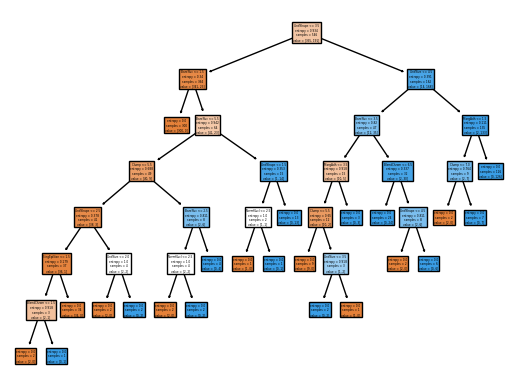

In [105]:
tree.plot_tree(model,feature_names=list(x.columns),filled=True)
plt.show()